# LEAD SCORING CASE STUDY

In [313]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

import math
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

## Reading and Understanding the Data

In [314]:
#Reading dataset
lead_scoring_df=pd.read_csv(r'C:\Users\Cheenu\Documents\upGrad\Lead Scoring Assignment\Leads.csv')
print('The shape of the dataframe is:',lead_scoring_df.shape)
lead_scoring_df.head()

The shape of the dataframe is: (9240, 37)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [315]:
# Analysing the number of missing values
round(100*lead_scoring_df.isnull().sum()/len(lead_scoring_df),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [316]:
# Checking for duplicate rows
lead_scoring_df.duplicated(subset=None, keep='first').sum()

0

In [317]:
lead_scoring_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [318]:
# Creating  a copy of the dataframe before changing it
ls_df=lead_scoring_df.copy()
ls_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## EDA

### Univariate Analysis

In [319]:
# Definning a function to plot barchart
def func_bar(*args,data_df):                        
    m=math.ceil(len(args)/2)  # getting the length f arguments to determine the shape of subplots                   
    fig,axes = plt.subplots(m,2,squeeze=False, figsize = (16, 6*m))
    ax_li = axes.flatten()       # flattening the numpy array returned by subplots
    i=0
    for col in args:
        sns.countplot(x=col, data=data_df,ax=ax_li[i], order = data_df[col].value_counts().index)
        ax_li[i].set_title(col)
        ax_li[i].set_yscale('log')
        plt.tight_layout()
        i=i+1

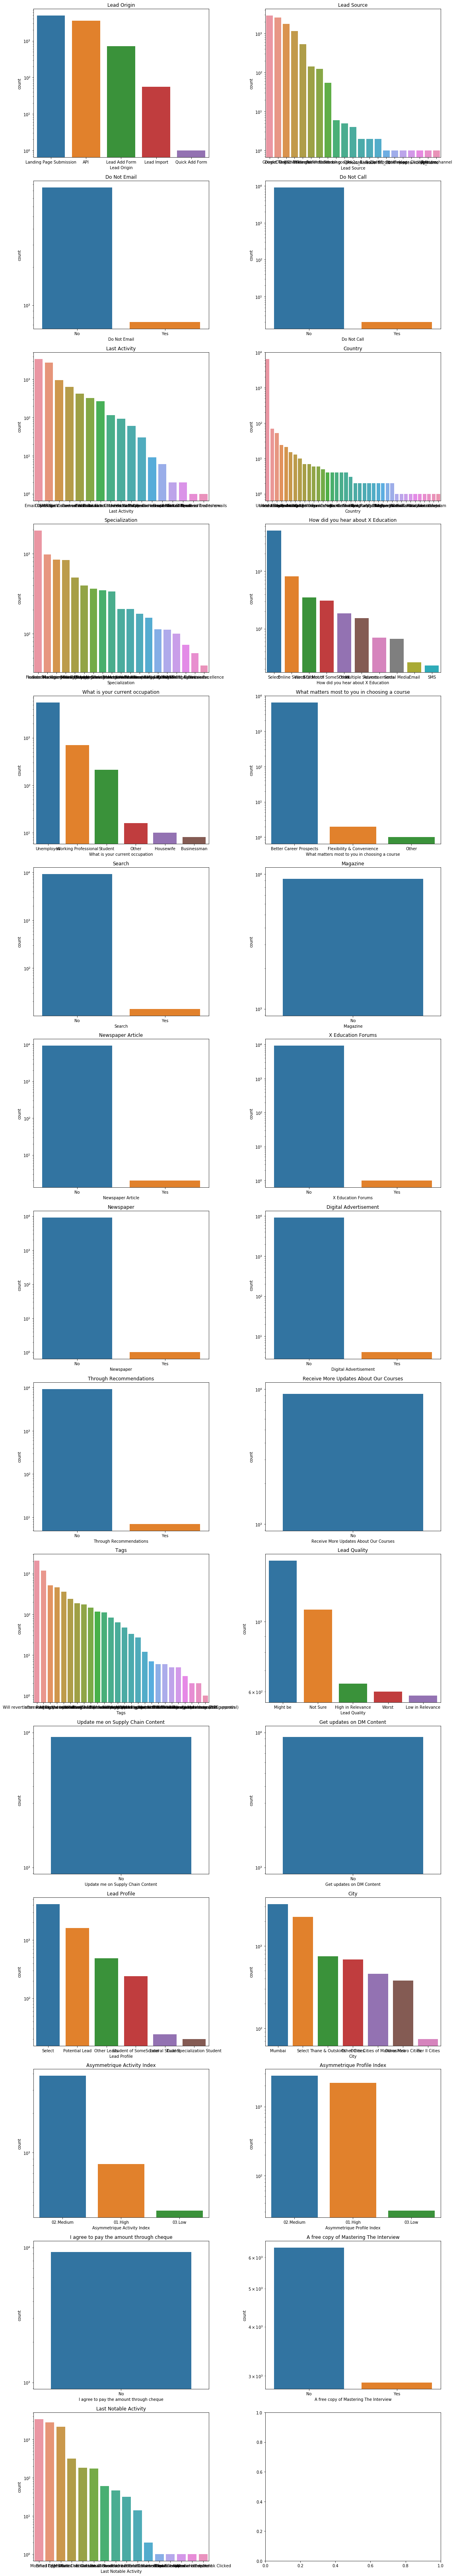

In [320]:
cat_list=ls_df.select_dtypes('object').columns.tolist()
func_bar(*cat_list[1:],data_df=ls_df)

**From above analysis, following observations are made:**

*1. There are certain columns(like Magazine,Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content ,I agree to pay the amount through cheque)  that have only one value - 'No' are not considered in further analysis as they will not help in classification**

*2. There are a few categorical variables, namely,  Do Not Email,Do Not Call, What matters most to you in choosing a course, Search, Newspaper Article, X Education Forums,Newspaper,Digital Advertisement and Through Recommendations that have one level dominatig the others. Hence the proportions of these levels should be determined and should be removed if not found necessary.**

*3. There are categorical variables like 'Specialization', 'How did you hear about X Education', etc that has values'Select'. These columns must have been given as options to users and responses of users who didn't choose any option are marked as 'Select'. These are same as Not available and hence they are replaced with nan**



In [321]:
# Deleting columns with only 1 unique value - 'NO':

ls_df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
             'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)
ls_df.shape

(9240, 32)

In [322]:
# Function to get unique values in each category:
#from termcolor import cprint
def uniq(*args,data):
    df=data
    for col in args:
 #       cprint(col + ":",'red',attrs=['bold'] )
        print(df[col].value_counts())

In [323]:
col = ['Do Not Email','Do Not Call', 'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']
uniq(*col,data=ls_df)

No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
No     9226
Yes      14
Name: Search, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No     9239
Yes       1
Name: X Education Forums, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
No     9233
Yes       7
Name: Through Recommendations, dtype: int64


We observe that in most of the columns above, only one value dominates the specific category and hence they will not be useful in classification. Hence they can be removed

In [324]:
ls_df.drop(col[1:],axis=1,inplace=True)
ls_df.shape

(9240, 24)

### Handling 'Select' values
    Replacing them with np.nan values

In [325]:
# Changing 'Select' values to 'nan' using a function
def change_to_nan(*args,data):
    for col in args:
        data[col]=data[col].replace('Select',np.nan)

In [326]:
col = ['Specialization', 'How did you hear about X Education','Lead Profile','City']  
change_to_nan(*col,data=ls_df)

In [327]:
# Inspecting the missing values in all columns again
round(100*ls_df.isnull().sum()/len(ls_df),2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                            36.58
How did you hear about X Education        78.46
What is your current occupation           29.11
Tags                                      36.29
Lead Quality                              51.59
Lead Profile                              74.19
City                                      39.71
Asymmetrique Activity Index               45.65
Asymmetrique Profile Index                45.65
Asymmetrique Activity Score             

### Handling missing values

    1.Drop columns which high missing values. ( Selected > 40 % )
    2.Check the distribution of different levels in categorical variables
    3.Drop highly skewed variables
    4.Impute or handle the missing values
    5.Handle remaining rows containing missing values

#### 1.Drop columns which high missing values. ( Selected > 40 % )

In [328]:
# Based on the above missing values %, Decision is made to drop columns having more than 40% missing values

col_to_drop=['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Activity Index'
             ,'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']

ls_df.drop(col_to_drop,axis=1,inplace=True)
ls_df.shape


(9240, 17)

#### 2.Check the distribution of different levels in categorical variables

In [329]:
ls_df['Specialization'].value_counts()/len(lead_scoring_df) * 100

Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [330]:
ls_df['What is your current occupation'].value_counts()/len(lead_scoring_df) * 100

Unemployed              60.606061
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [331]:
ls_df['City'].value_counts()/len(lead_scoring_df) * 100

Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [332]:
ls_df['Country'].value_counts()/len(lead_scoring_df) * 100

India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Canada                   0.043290
Nigeria                  0.043290
Kuwait                   0.043290
South Africa             0.043290
Germany                  0.043290
Sweden                   0.032468
Ghana                    0.021645
Belgium                  0.021645
Italy                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
China                    0.021645
Philippines              0.021645
Netherlands              0.021645
Bangladesh               0.021645
Russia                   0.010823
Denmark       

In [333]:
ls_df['Tags'].value_counts()/len(lead_scoring_df) * 100

Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0.357143
number not provided                                   0

#### 3.Drop highly skewed variables

In [334]:
ls_df.drop(['Country'],axis=1,inplace=True)
ls_df.shape

(9240, 16)

#### 4.Impute or handle the missing values

In [335]:
# Create new dummy level for missing values

ls_df['Specialization'].fillna('Others', inplace=True)
ls_df['What is your current occupation'].fillna('Not Mentioned', inplace=True) 
ls_df['Tags'].fillna('No tag', inplace=True)  
ls_df['City'].fillna('Not Mentioned', inplace=True)

#### 5.Handle remaining rows containing missing values

In [336]:
ls_df.isnull().sum()/len(ls_df) * 100

Prospect ID                               0.000000
Lead Number                               0.000000
Lead Origin                               0.000000
Lead Source                               0.389610
Do Not Email                              0.000000
Converted                                 0.000000
TotalVisits                               1.482684
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.482684
Last Activity                             1.114719
Specialization                            0.000000
What is your current occupation           0.000000
Tags                                      0.000000
City                                      0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [337]:
ls_df.dropna(inplace=True)
ls_df.shape

(9074, 16)

### Visualize

In [338]:
# Getting a list of categories :
category_list=ls_df.select_dtypes('object').columns.tolist()

# Getting a list of numerical columns :
num_list=ls_df.select_dtypes(exclude='object').columns.tolist()

### Univariate Analysis - Numerical values plot

In [339]:
#function for box plot
def bx_plot(*args,data): 
    
    m=math.ceil(len(args)/2)  # getting the length f arguments to determine the shape of subplots                   
    fig,axes = plt.subplots(m,2,squeeze=False, figsize = (16, 3*m))
    ax_li = axes.flatten()       # flattening the numpy array returned by subplots
    i=0
    for col in args:
        sns.boxplot(data[col],ax=ax_li[i])  # plotting the box plot
        ax_li[i].set_title(col)
        #ax_li[i].set_xscale('log')
        plt.tight_layout()
        i=i+1
    

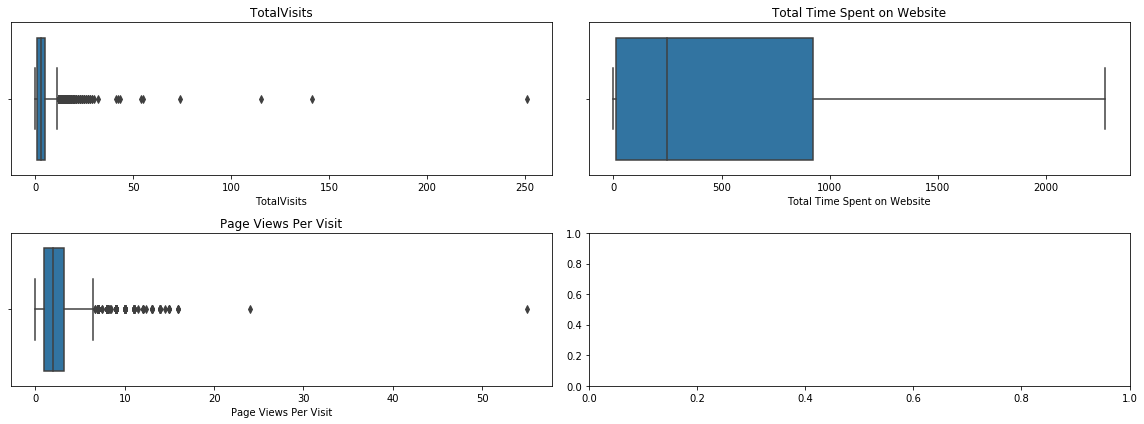

In [340]:
bx_plot(*num_list[2:],data=ls_df)

### Bivariate Analysis - Categorical Column

In [341]:
# function to plot stacked bar charts

def plot_bar_stacked(*args,data_df):                        
                     
    m=math.ceil(len(args)/2)  # getting the length f arguments to determine the shape of subplots                   
    
    fig,axes = plt.subplots(m,2, figsize = (12, 6*m))
    ax_li =[item for sublist in axes for item in sublist]
    
    for col in args:
        ax_info = ax_li.pop()
        df1 = data_df.groupby(col)['Converted'].value_counts()
        gf=round(100*df1/sum(df1),2).unstack().sort_values(by=0,ascending=False).plot.bar(stacked=True,ax=ax_info)
        ax_info.set_title(col)
        ax_info.xaxis.set_tick_params(rotation=90)
        ax_info.set(xlabel='')
        ax_info.set(ylabel='Percentage')
        #ax_info.legend(['Paid','Default'],bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
        plt.tight_layout()
        

<Figure size 1080x1440 with 0 Axes>

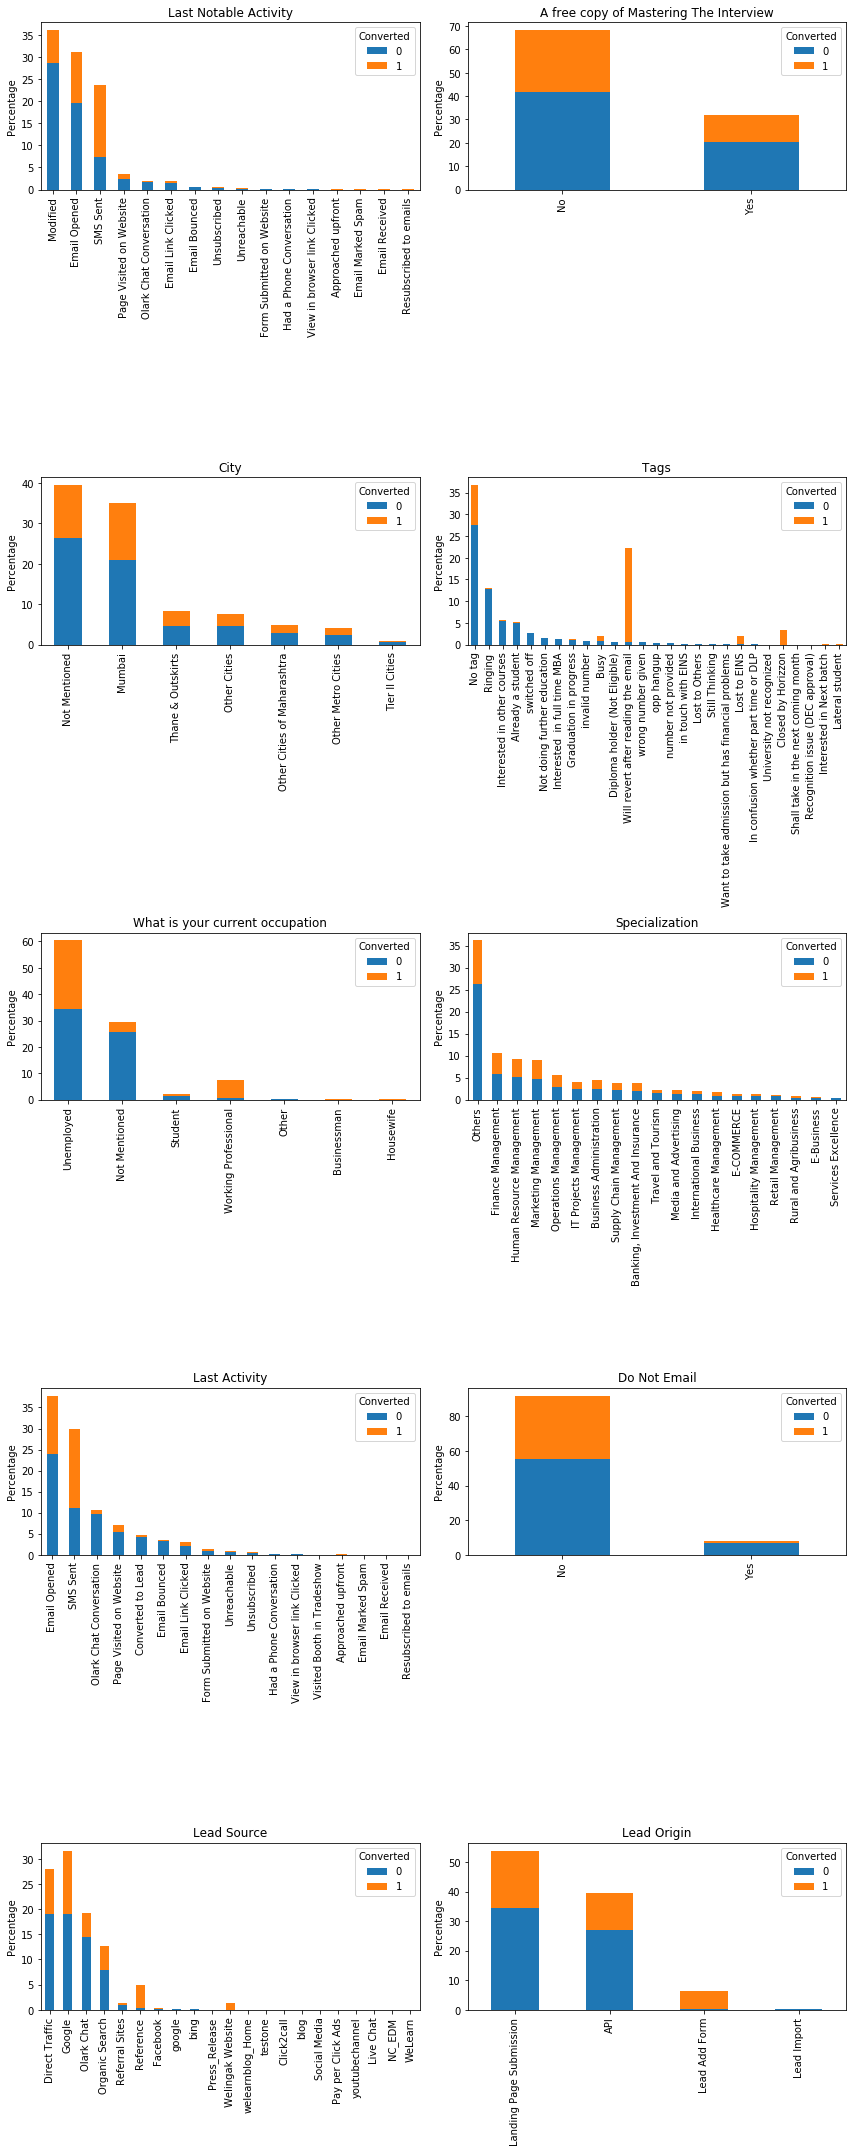

In [342]:
plt.figure(figsize=(15,20))
plot_bar_stacked(*category_list[1:],data_df=ls_df)

In [343]:
def plot_hist(*args,data_df):                        
   
    m=len(args)  # getting the length f arguments to determine the shape of subplots   
    data_df1 = data_df.loc[data_df['Converted']==1]
    data_df0 = data_df.loc[data_df['Converted']==0]
    
    fig,axes = plt.subplots(m,2,squeeze=False, figsize = (16, 6*m))
    ax_li =[item for sublist in axes for item in sublist]
    
  
    for col in args:
        ax_info = ax_li.pop()
        data_df1.pivot(columns='Converted')[col].plot(kind = 'hist', bins=15,rwidth=0.95,stacked=True,ax=ax_info)
        ax_info.set_title(col+' Converted')
        ax_info.set(xlabel='')
        ax_info.set_yscale('log')
        ax_info = ax_li.pop()
        data_df0.pivot(columns='Converted')[col].plot(kind = 'hist', 
                                                      bins=15,rwidth=0.95,stacked=True,ax=ax_info,color='orange')
        ax_info.set_title(col + ' Not Converted')
        ax_info.set(xlabel='')
        ax_info.set_yscale('log')
        plt.tight_layout()

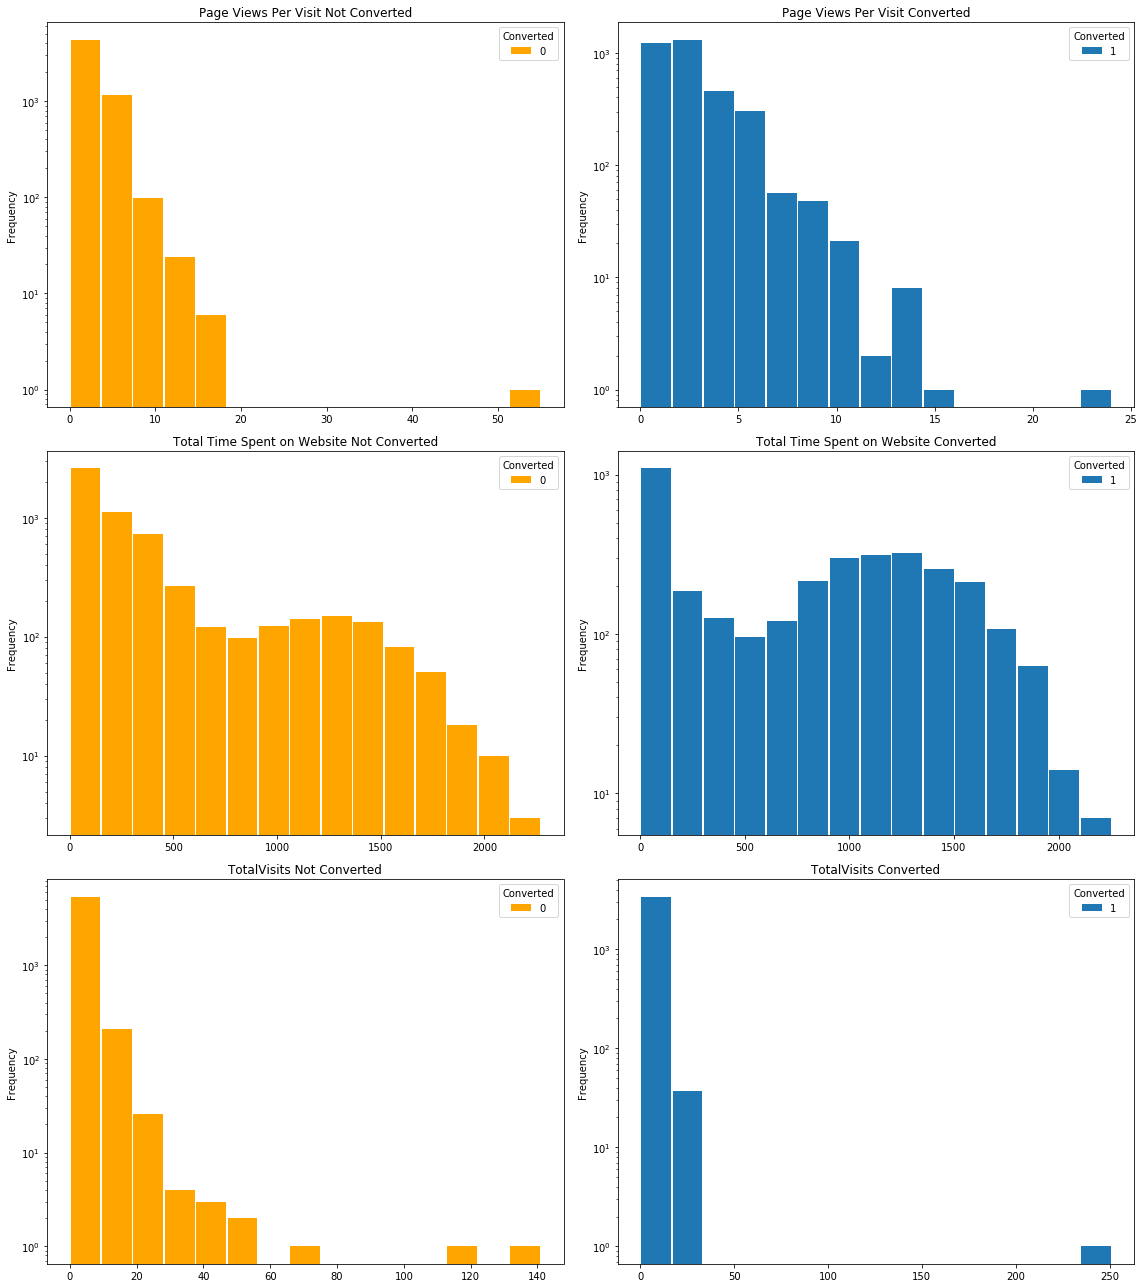

In [344]:
plot_hist(*num_list[2:],data_df=ls_df)

## Data Preparation

    1. Numerical column - Outlier value treatment
    2. Categorical column - Binary value conversion
    3. Categorical column - Dummy variable creation
    4. Drop Highly Correlated variables
    5. Train - Test Split
    6. Scaling

#### 1. Numerical column - Outlier value treatment

In [345]:
ls_df[num_list[2:]].describe(percentiles=[.75,0.8,0.9,.95,.99,.999,.9999,1])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
80%,5.000000,1078.400000,4.000000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


In [346]:
# Selecting only data till 99.9% quantile

quant_visits=ls_df['TotalVisits'].quantile(0.999)
ls_df=ls_df[ls_df['TotalVisits']<=quant_visits]

quant_views=ls_df['Page Views Per Visit'].quantile(0.999)
ls_df=ls_df[ls_df['Page Views Per Visit']<=quant_views]

quant_views=ls_df['Total Time Spent on Website'].quantile(0.999)
ls_df=ls_df[ls_df['Total Time Spent on Website']<=quant_views]


In [347]:
ls_df.shape

(9045, 16)

#### 2. Categorical column - Binary value conversion

In [348]:
varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']


def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

ls_df[varlist] = ls_df[varlist].apply(binary_map) 
ls_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Not Mentioned,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Mentioned,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified


#### 3. Categorical column - Dummy variable creation

In [349]:
cat_list = ['Lead Origin', 'Lead Source', 'Last Activity','Specialization',
                               'What is your current occupation', 'Tags','City','Last Notable Activity']

ls_df_dummy = pd.get_dummies(ls_df[cat_list])

In [350]:
# Selecting column to manually drop 1 per variable
# As 'n-1' columns is enough to represent 'n' levels after dummy creation

ls_df['Lead Origin'].value_counts() # Lead Import
ls_df['Lead Source'].value_counts() # testone
ls_df['Last Activity'].value_counts() # Resubscribed to emails
ls_df['Specialization'].value_counts() # Others
ls_df['What is your current occupation'].value_counts() # Not Mentioned
ls_df['Tags'].value_counts() # No tag
ls_df['City'].value_counts() # Not Mentioned
ls_df['Last Notable Activity'].value_counts() # Resubscribed to emails

Modified                        3258
Email Opened                    2818
SMS Sent                        2142
Page Visited on Website          313
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Email Received                     1
Form Submitted on Website          1
Approached upfront                 1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [351]:
# drop the columns based on above selection

ls_df_dummy.drop(['Lead Origin_Lead Import','Lead Source_testone','Last Activity_Resubscribed to emails',
             'Specialization_Others','What is your current occupation_Not Mentioned'
                  ,'Tags_No tag','City_Not Mentioned','Last Notable Activity_Resubscribed to emails'],
                 axis=1,inplace=True)

In [352]:
# Adding the results to the master dataframe
ls_df = pd.concat([ls_df, ls_df_dummy], axis=1)

In [353]:
# Dropping original categorical columns
ls_df.drop(['Lead Origin', 'Lead Source', 'Last Activity','Specialization','City',
            'What is your current occupation', 'Tags', 'Last Notable Activity'],axis=1,inplace=True)

#### 4. Drop Highly Correlated variables

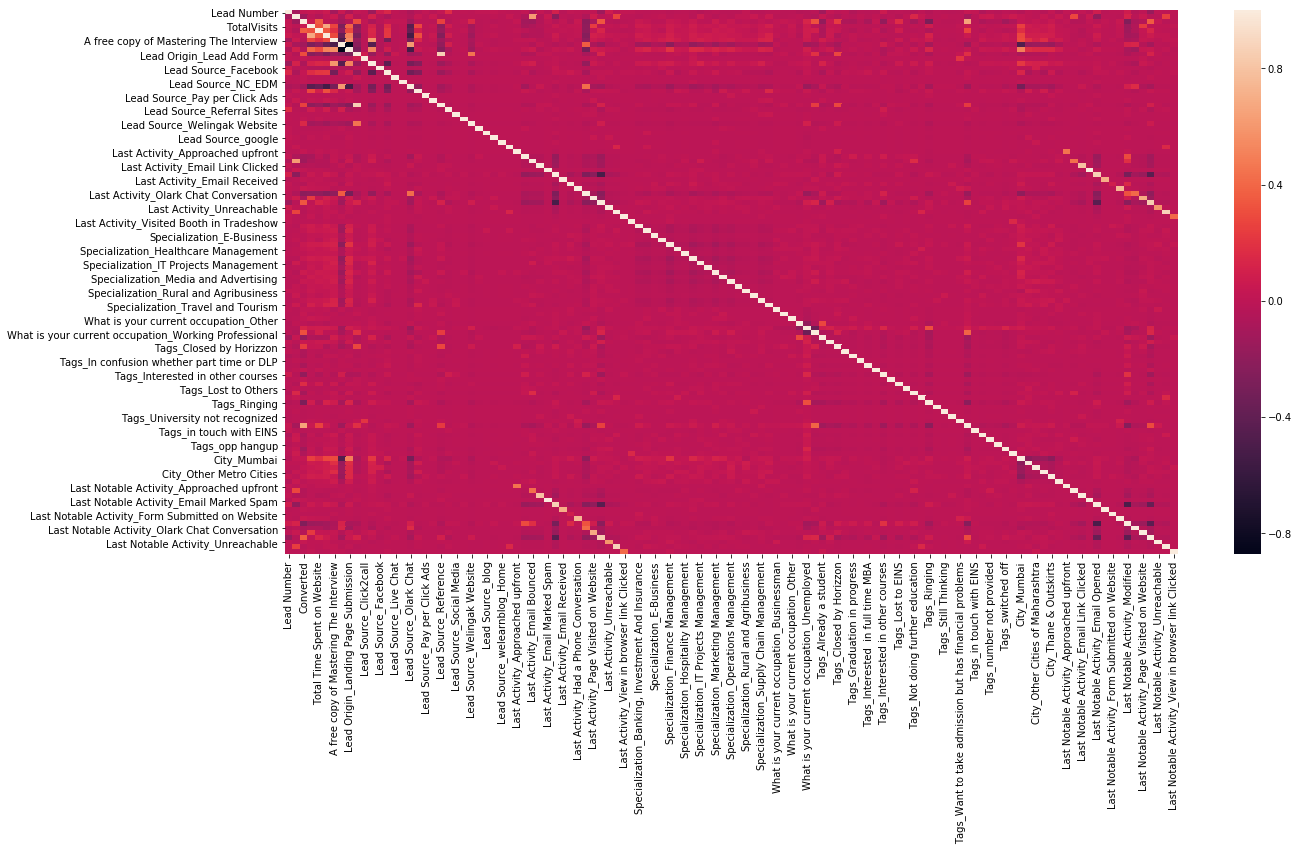

In [354]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(ls_df.corr())
plt.show()

In [355]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()  
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]



In [356]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(ls_df[ls_df.columns[2:]], 20))

Top Absolute Correlations
Last Activity_Email Marked Spam         Last Notable Activity_Email Marked Spam           1.000000
Last Activity_Unsubscribed              Last Notable Activity_Unsubscribed                0.872654
Lead Origin_API                         Lead Origin_Landing Page Submission               0.870961
Lead Origin_Lead Add Form               Lead Source_Reference                             0.866168
Last Activity_Email Opened              Last Notable Activity_Email Opened                0.861321
Last Activity_SMS Sent                  Last Notable Activity_SMS Sent                    0.852809
Last Activity_Email Link Clicked        Last Notable Activity_Email Link Clicked          0.800672
Last Activity_Had a Phone Conversation  Last Notable Activity_Had a Phone Conversation    0.747876
Last Activity_Email Received            Last Notable Activity_Email Received              0.707068
Last Activity_Page Visited on Website   Last Notable Activity_Page Visited on Websi

In [357]:
# Deleting one of the two highly correlated varibles (variables having a correlation >=60%)

In [358]:
ls_df.drop(['Last Activity_Email Marked Spam','Last Activity_Unsubscribed','Lead Origin_Landing Page Submission',
            'Lead Origin_Lead Add Form','Last Activity_Email Opened','Last Activity_SMS Sent',
            'Last Activity_Email Link Clicked','Last Activity_Had a Phone Conversation',
            'Last Activity_Email Received','Last Activity_Page Visited on Website',
            'TotalVisits'],axis=1,inplace=True)

In [359]:
ls_df.shape

(9045, 107)

#### 5. Train - Test Split

In [360]:
#Keep all feature variables to X
X = ls_df.drop(['Prospect ID','Lead Number','Converted'], axis=1)
X.head()

,Do Not Email,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,674,2.5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,305,1.0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1428,1.0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [361]:
# Keep target / response variable to y
y = ls_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [362]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### 6. Scaling

In [363]:
scaler = StandardScaler()
X_train[['Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(
    X_train[['Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2213,0,-0.622291,0.308818,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6355,0,-0.579799,0.308818,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8338,0,0.301445,0.797201,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7102,0,-0.095762,-0.179565,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7170,0,0.835364,0.064627,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


## Model Building

    1.Initial Model Build
    2.Limit the features using RFE
    3.Manul fine tuning of features
    4.Final model 

#### 1.Initial Model Build

In [364]:
# initial model with all features

X_train_sm = sm.add_constant(X_train)
log_m = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6331
Model:                            GLM   Df Residuals:                     6228
Model Family:                Binomial   Df Model:                          102
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1014.6
Date:                Mon, 18 Nov 2019   Deviance:                       2029.1
Time:                        00:19:43   Pearson chi2:                 9.44e+03
No. Iterations:                    24   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -0.1513   2.63e+05  -5.74e-07      1.000   -5.16e+05    5.16e+05
Do Not Email                                              -0.9174      0.363     -2.530      0.011      -1.628      -0.207
Total Time Spent on Website                                1.0722      0.069     15.435      0.000       0.936       1.208
Page Views Per Visit                                      -0.0009      0.087     -0.010      0.992      -0.172       0.170
A free copy of Mastering The Interview                     0.0915      0.202      0.453      0.650      -0.304       0.487
Lead Origin_API                                            0.2355      0.274      0.858      0.391      -0.302       0.773
Lead Source_Click2call                                    21.3370   1.86e+05      0.000      1.000   -3.65e+05    3.65e+05
Lead Source_Direct Traffic                                20.1147   1.86e+05      0.000      1.000   -3.65e+05    3.65e+05
Lead Source_Facebook                                      20.1215   1.86e+05      0.000      1.000   -3.65e+05    3.65e+05
Lead Source_Google                                        20.2914   1.86e+05      0.000      1.000   -3.65e+05    3.65e+05
Lead Source_Live Chat                                     41.5500   2.36e+05      0.000      1.000   -4.63e+05    4.63e+05
Lead Source_NC_EDM                                        47.7526   3.15e+05      0.000      1.000   -6.18e+05    6.18e+05
Lead Source_Olark Chat                                    21.1546   1.86e+05      0.000      1.000   -3.65e+05    3.65e+05
Lead Source_Organic Search                                20.3641   1.86e+05      0.000      1.000   -3.65e+05    3.65e+05
Lead Source_Pay per Click Ads                              0.2172   3.11e+05   6.99e-07      1.000   -6.09e+05    6.09e+05
Lead Source_Press_Release                                 -2.3604   2.74e+05  -8.63e-06      1.000   -5.36e+05    5.36e+05
Lead Source_Reference                                     21.5709   1.86e+05      0.000      1.000   -3.65e+05    3.65e+05
Lead Source_Referral Sites                                20.5505   1.86e+05      0.000      1.000   -3.65e+05    3.65e+05
Lead Source_Social Media                                   0.5179   2.57e+05   2.01e-06      1.000   -5.04e+05    5.04e+05
Lead Source_WeLearn                                       41.2639   2.81e+05      0.000      1.000    -5.5e+05     5.5e+05
Lead Source_Welingak Website                              45.7421   1.87e+05      0.000      1.000   -3.67e+05    3.67e+05
Lead Source_bing                                          -1.3566   2.12e+05  -6.39e-06      1.000   -4.16e+05    4.16e+05
Lead Source_blog                                        3.593e-09   9.04e-05   3.97e-05

#### 2.Limit the features using RFE

In [365]:
logreg = LogisticRegression()

rfe = RFE(logreg,10)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [366]:
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['Lead Source_Welingak Website', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [367]:
X1_train_sm = sm.add_constant(X_train[rfe_cols])
log_m1 = sm.GLM(y_train,X1_train_sm, family = sm.families.Binomial())
res1 = log_m1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6331
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1471.3
Date:                Mon, 18 Nov 2019   Deviance:                       2942.6
Time:                        00:19:57   Pearson chi2:                 8.24e+03
No. Iterations:                    24   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.1172      0.061    -34.522      0.000      -2.237      -1.997
Lead Source_Welingak Website                25.9599   1.71e+04      0.002      0.999   -3.36e+04    3.36e+04
Tags_Already a student                      -3.6604      1.003     -3.648      0.000      -5.627      -1.694
Tags_Closed by Horizzon                      7.3851      1.004      7.352      0.000       5.416       9.354
Tags_Lost to EINS                            5.7099      0.588      9.703      0.000       4.557       6.863
Tags_Ringing                                -3.2889      0.231    -14.243      0.000      -3.741      -2.836
Tags_Will revert after reading the email     5.1300      0.183     28.090      0.000       4.772       5.488
Tags_invalid number                         -3.8391      1.027     -3.739      0.000      -5.852      -1.827
Tags_switched off                           -4.2405      0.724     -5.857      0.000      -5.659      -2.822
Tags_wrong number given                    -25.3998    3.5e+04     -0.001      0.999   -6.85e+04    6.85e+04
Last Notable Activity_SMS Sent               2.9632      0.119     24.971      0.000       2.731       3.196
============================================================================================================
"""

#### 3.Manul fine tuning of features

In [368]:
# Check for the VIF values of the feature variables. 

vif = pd.DataFrame()
vif['Features'] = X1_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X1_train_sm.values, i) for i in range(X1_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,2.12
6,Tags_Will revert after reading the email,1.24
10,Last Notable Activity_SMS Sent,1.17
5,Tags_Ringing,1.12
2,Tags_Already a student,1.05
3,Tags_Closed by Horizzon,1.04
8,Tags_switched off,1.03
1,Lead Source_Welingak Website,1.02
4,Tags_Lost to EINS,1.02
7,Tags_invalid number,1.01


In [369]:
# Iteration 1 - Dropping Tags_wrong number given - as it has high P-Value

X1_modified_1 = X1_train_sm.drop('Tags_wrong number given',1,)

In [370]:
log_m2 = sm.GLM(y_train,X1_modified_1, family = sm.families.Binomial())
res2 = log_m2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6331
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1488.4
Date:                Mon, 18 Nov 2019   Deviance:                       2976.8
Time:                        00:20:42   Pearson chi2:                 8.02e+03
No. Iterations:                    24   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.1255      0.061    -34.670      0.000      -2.246      -2.005
Lead Source_Welingak Website                25.9801   1.72e+04      0.002      0.999   -3.37e+04    3.37e+04
Tags_Already a student                      -3.6521      1.003     -3.640      0.000      -5.619      -1.685
Tags_Closed by Horizzon                      7.3934      1.004      7.361      0.000       5.425       9.362
Tags_Lost to EINS                            5.7182      0.588      9.718      0.000       4.565       6.872
Tags_Ringing                                -3.2063      0.229    -13.981      0.000      -3.656      -2.757
Tags_Will revert after reading the email     5.1426      0.183     28.175      0.000       4.785       5.500
Tags_invalid number                         -3.7550      1.026     -3.659      0.000      -5.766      -1.744
Tags_switched off                           -4.1560      0.723     -5.746      0.000      -5.574      -2.738
Last Notable Activity_SMS Sent               2.8789      0.116     24.864      0.000       2.652       3.106
============================================================================================================
"""

In [371]:
# Check for the VIF values of the feature variables. 

vif = pd.DataFrame()
vif['Features'] = X1_modified_1.columns
vif['VIF'] = [variance_inflation_factor(X1_modified_1.values, i) for i in range(X1_modified_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,2.10
6,Tags_Will revert after reading the email,1.24
9,Last Notable Activity_SMS Sent,1.16
5,Tags_Ringing,1.12
2,Tags_Already a student,1.05
3,Tags_Closed by Horizzon,1.04
8,Tags_switched off,1.03
1,Lead Source_Welingak Website,1.02
4,Tags_Lost to EINS,1.02
7,Tags_invalid number,1.01


In [372]:
# Iteration 2 - Dropping Lead Source_Welingak Website - as it has high P-Value

X1_modified_2 = X1_modified_1.drop('Lead Source_Welingak Website',1,)

In [373]:
log_m3 = sm.GLM(y_train,X1_modified_2, family = sm.families.Binomial())
res3 = log_m3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6331
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1562.0
Date:                Mon, 18 Nov 2019   Deviance:                       3124.0
Time:                        00:21:40   Pearson chi2:                 8.26e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.0398      0.059    -34.534      0.000      -2.156      -1.924
Tags_Already a student                      -3.7379      1.003     -3.726      0.000      -5.704      -1.772
Tags_Closed by Horizzon                      7.3579      1.004      7.327      0.000       5.390       9.326
Tags_Lost to EINS                            5.6686      0.588      9.641      0.000       4.516       6.821
Tags_Ringing                                -3.3351      0.229    -14.570      0.000      -3.784      -2.886
Tags_Will revert after reading the email     5.0601      0.182     27.821      0.000       4.704       5.417
Tags_invalid number                         -3.8848      1.026     -3.786      0.000      -5.896      -1.873
Tags_switched off                           -4.2860      0.723     -5.926      0.000      -5.703      -2.868
Last Notable Activity_SMS Sent               2.9280      0.113     25.882      0.000       2.706       3.150
============================================================================================================
"""

In [304]:
# Check for the VIF values of the feature variables. 

vif = pd.DataFrame()
vif['Features'] = X1_modified_2.columns
vif['VIF'] = [variance_inflation_factor(X1_modified_2.values, i) for i in range(X1_modified_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1.50
7,Tags_Ringing,1.04
1,What is your current occupation_Working Profes...,1.02
4,Tags_Interested in other courses,1.02
5,Tags_Lost to EINS,1.01
6,Tags_Not doing further education,1.01
8,Tags_switched off,1.01
2,Tags_Diploma holder (Not Eligible),1.00
3,Tags_Interested in full time MBA,1.00


In [374]:
# Iteration 2 - Dropping Tags_wrong number given - as it has high negative co-eff

X1_modified_3 = X1_modified_2.drop('Tags_switched off',1,)

In [375]:
log_m4 = sm.GLM(y_train,X1_modified_3, family = sm.families.Binomial())
res4 = log_m4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6331
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1627.0
Date:                Mon, 18 Nov 2019   Deviance:                       3254.1
Time:                        00:22:05   Pearson chi2:                 7.26e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.0852      0.059    -35.383      0.000      -2.201      -1.970
Tags_Already a student                      -3.6925      1.003     -3.681      0.000      -5.659      -1.726
Tags_Closed by Horizzon                      7.4033      1.004      7.372      0.000       5.435       9.371
Tags_Lost to EINS                            5.7139      0.588      9.719      0.000       4.562       6.866
Tags_Ringing                                -3.0605      0.224    -13.634      0.000      -3.500      -2.621
Tags_Will revert after reading the email     5.1207      0.182     28.210      0.000       4.765       5.476
Tags_invalid number                         -3.6048      1.024     -3.520      0.000      -5.612      -1.598
Last Notable Activity_SMS Sent               2.6636      0.105     25.472      0.000       2.459       2.869
============================================================================================================
"""

In [376]:
# y prediction

y_train_pred = res4.predict(X1_modified_3).values.reshape(-1)

In [377]:
y_train_pred[:10]

array([0.00579101, 0.11054723, 0.11054723, 0.9541521 , 0.9541521 ,
       0.11054723, 0.99512195, 0.64070978, 0.11054723, 0.11054723])

In [378]:
#Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,CustID
0,0,0.005791,2213
1,0,0.110547,6355
2,1,0.110547,8338
3,1,0.954152,7102
4,1,0.954152,7170


In [379]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.005791,2213,1,0,0,0,0,0,0,0,0,0
1,0,0.110547,6355,1,1,0,0,0,0,0,0,0,0
2,1,0.110547,8338,1,1,0,0,0,0,0,0,0,0
3,1,0.954152,7102,1,1,1,1,1,1,1,1,1,1
4,1,0.954152,7170,1,1,1,1,1,1,1,1,1,1


In [380]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.369610  1.000000  0.000000
0.1   0.1  0.554415  0.988889  0.299674
0.2   0.2  0.910757  0.855556  0.943122
0.3   0.3  0.910757  0.855556  0.943122
0.4   0.4  0.910757  0.855556  0.943122
0.5   0.5  0.910757  0.855556  0.943122
0.6   0.6  0.910757  0.855556  0.943122
0.7   0.7  0.884694  0.704701  0.990228
0.8   0.8  0.884694  0.704701  0.990228
0.9   0.9  0.884694  0.704701  0.990228


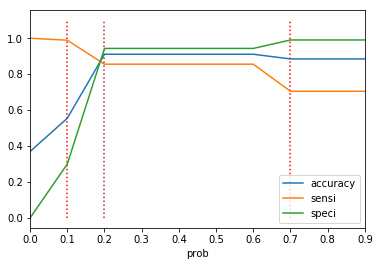

In [407]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(0.2,0,1.1,linestyles='dotted',colors='brown')
plt.vlines(0.1,0,1.1,linestyles='dotted',colors='red')
plt.vlines(0.7,0,1.1,linestyles='dotted',colors='red')
plt.show()

In [383]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x >= 0.2 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.005791,2213,1,0,0,0,0,0,0,0,0,0,0
1,0,0.110547,6355,1,1,0,0,0,0,0,0,0,0,0
2,1,0.110547,8338,1,1,0,0,0,0,0,0,0,0,0
3,1,0.954152,7102,1,1,1,1,1,1,1,1,1,1,1
4,1,0.954152,7170,1,1,1,1,1,1,1,1,1,1,1


In [384]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9107565945348286


In [385]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3764  227]
 [ 338 2002]]


In [386]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [388]:
# Printing other performance meterics
print('Sensitivity                = ', TP / float(TP+FN))
print('Specificity                = ',TN / float(TN+FP))
print('false positive rate         = ',FP/ float(TN+FP))
print ('positive predictive value  = ',TP / float(TP+FP))
print ('Negative predictive value  = ', TN / float(TN+FN))

Sensitivity                =  0.8555555555555555
Specificity                =  0.9431220245552493
false postive rate         =  0.05687797544475069
positive predictive value  =  0.8981606101390758
Negative predictive value  =  0.9176011701608972


### ROC

In [389]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [390]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

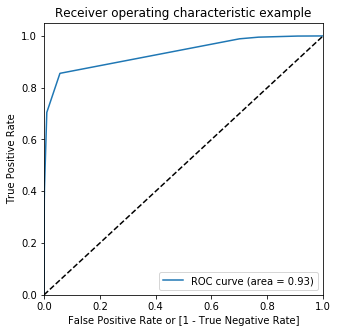

In [391]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Test Data - Prediction

In [392]:
# Scaling the data

X_test[['Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit']])

In [393]:
final_cols = X1_modified_3.columns
final_cols[1:]

Index(['Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [394]:
X_test = X_test[final_cols[1:]]
X_test.head()

,Tags_Already a student,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Last Notable Activity_SMS Sent
5449,0,0,0,1,0,0,0
6067,0,0,0,0,0,0,0
4422,0,0,0,0,1,0,1
3038,0,0,0,0,0,0,0
5640,0,0,0,0,0,0,0


In [395]:
X_test_sm = sm.add_constant(X_test)

In [396]:
#Making predictions on the test set

y_test_pred = res4.predict(X_test_sm)

# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5449,0.005791
6067,0.110547
4422,0.996662
3038,0.110547
5640,0.110547


In [397]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,CustID,0
0,0,5449,0.005791
1,0,6067,0.110547
2,1,4422,0.996662
3,0,3038,0.110547
4,0,5640,0.110547


In [398]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Conversion_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Conversion_Prob
0,5449,0,0.005791
1,6067,0,0.110547
2,4422,1,0.996662
3,3038,0,0.110547
4,5640,0,0.110547


In [399]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_pred_final.head()

,CustID,Converted,Conversion_Prob,final_predicted
0,5449,0,0.005791,0
1,6067,0,0.110547,0
2,4422,1,0.996662,1
3,3038,0,0.110547,0
4,5640,0,0.110547,0


In [400]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9027266028002948

In [401]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1515,  113],
       [ 151,  935]], dtype=int64)

In [402]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [404]:
# Printing other performance meterics
print('Sensitivity                = ', TP / float(TP+FN))
print('Specificity                = ',TN / float(TN+FP))
print('false positive rate         = ',FP/ float(TN+FP))
print ('positive predictive value  = ',TP / float(TP+FP))
print ('Negative predictive value  = ', TN / float(TN+FN))

Sensitivity                =  0.8609576427255985
Specificity                =  0.9305896805896806
false postive rate         =  0.06941031941031942
positive predictive value  =  0.892175572519084
Negative predictive value  =  0.9093637454981993


In [91]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

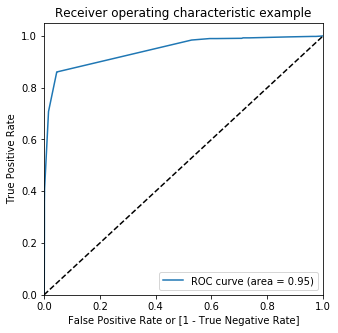

In [92]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)